In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


### seq2seq model

In [10]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=1, kernel_size=(2, 2),
                   input_shape=(None, 7, 9, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='mean_absolute_error', optimizer='sgd')
# seq.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae', 'acc'])

## load data
We dump the preprocessed data into the Python Pickle files

In [3]:
try:
    import cPickle as pickle
except:
    import pickle

In [5]:
with open('data//X-1316.pkl', 'rb') as file:
    X = bpickle.load(file)
with open('data//y-1316-seq.pkl', 'rb') as file1:
    Y = pickle.load(file1)

In [6]:
X.shape

(35016, 48, 7, 9, 1)

In [7]:
Y.shape

(35016, 48, 7, 9, 1)

## training

In [8]:
X_train = X[:30635]
Y_train = Y[:30635]

X_test = X[30635:35015]
Y_test = Y[30635:35015]

In [11]:
seq.fit(X_train, Y_train, batch_size=10, epochs=50, validation_split=0.05)

Train on 29103 samples, validate on 1532 samples
Epoch 1/50
29103/29103 [==============================] - 1447s 50ms/step - loss: 0.0835 - val_loss: 0.0324
Epoch 2/50
29103/29103 [==============================] - 1435s 49ms/step - loss: 0.0633 - val_loss: 0.0292
Epoch 3/50
29103/29103 [==============================] - 1437s 49ms/step - loss: 0.0591 - val_loss: 0.0272
Epoch 4/50
29103/29103 [==============================] - 1433s 49ms/step - loss: 0.0552 - val_loss: 0.0259
Epoch 5/50
29103/29103 [==============================] - 1430s 49ms/step - loss: 0.0487 - val_loss: 0.0242
Epoch 6/50
29103/29103 [==============================] - 1431s 49ms/step - loss: 0.0421 - val_loss: 0.0225
Epoch 7/50
29103/29103 [==============================] - 1429s 49ms/step - loss: 0.0387 - val_loss: 0.0212
Epoch 8/50
29103/29103 [==============================] - 1431s 49ms/step - loss: 0.0364 - val_loss: 0.0203
Epoch 9/50
29103/29103 [==============================] - 1429s 49ms/step - loss: 0.034

## prediction

In [12]:
Y_hat = seq.predict(X_test, verbose=0)

## visulization

In [18]:
def visulization(y, y_hat, n_slots):
    '''
    visulize the prpcess of prediction by randomly select n_slots predictions.
    y: the labels of test set: shape like (200, 9, 9, 1)
    y_hat: the predicted labels: shape like (200, 9, 9, 1)
    n_slots: number of frames to be visulized
    '''
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    length = y_hat.shape[0]
    random_ind = random.sample(range(0, length-1), n_slots)
    stations = ['station 0', 'station 1', 'station 2', 'station 3', 'station 4', 'station 5', 'station 6', 'station 7']
#     fea = ['co', 'no2', 'o3', 'pm10', 'pm2.5', 'so2', 'pressure', 'temperature', 'humidity']
    fea = ['co', 'no2', 'o3', 'pm10', 'pm2.5', 'so2', 'pres', 'temp', 'humi']
    for ind in random_ind:
        
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        
        plt.yticks(np.arange(8), stations, fontsize=12)
        ax1.set_yticklabels(stations,fontsize=13)
        ax1.set_xticklabels(fea)
#         plt.xticks = [0, 1, 2,3,4,5,6,7,8]
        plt.setp(ax1, xticks = [0, 1, 2,3,4,5,6,7,8])
    
        plt.setp(ax1.get_xticklabels(), rotation=30,ha="right", rotation_mode="anchor")
        plt.setp(ax2.get_xticklabels(), rotation=30)
#         plt.xticks(range(9), ['co', 'no2', 'o3', 'pm10', 'pm2.5', 'so2', 'pres', 'temp', 'humi'], rotation=30)
#         ax1 = pyplot.subplot(121)
        y_pre = y_hat[ind,23,:,:,0] #visulize the last frame
        ax1.imshow(y_pre)
#         plt.title('Predition', fontsize=15)
        plt.text(-9, -0.8, 'Predition', fontsize=13)
#         ax1.xticks(np.arange(9), ['co', 'no2', 'o3', 'pm10', 'pm2.5', 'so2', 'pres', 'temp', 'humi'])
#         ax2 = pyplot.subplot(122,sharey=ax1)
        y_truth = y[ind,23,:,:,0]
        ax2.imshow(y_truth)
#         plt.title('Ground truth', fontsize=15)
        plt.text(2, -0.8, 'Ground truth', fontsize=13)
    plt.savefig('figs//predict-map.pdf', dpi=300, bbox_inches ='tight')

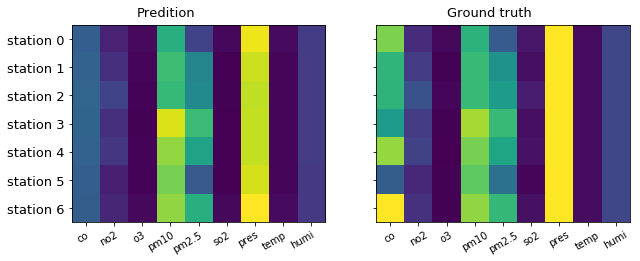

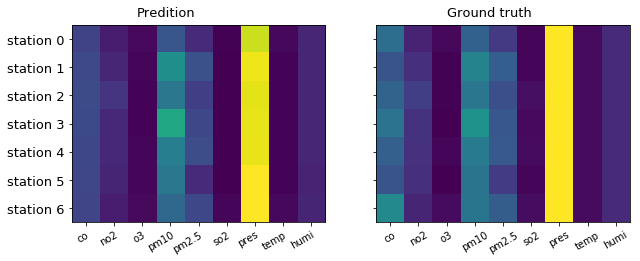

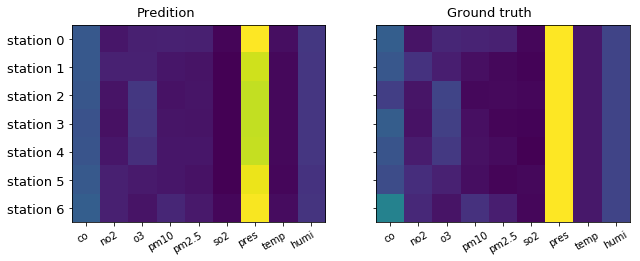

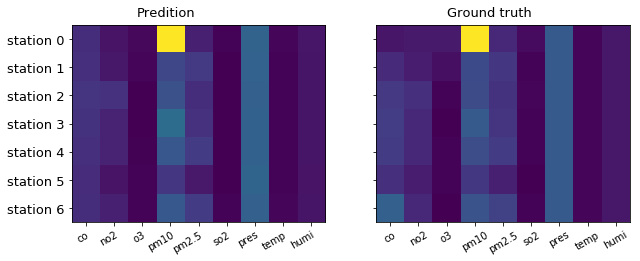

In [19]:
visulization(Y_test, Y_hat, 4)